In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
data1=pd.DataFrame(digits.data)

In [7]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
#imshow()----> display image

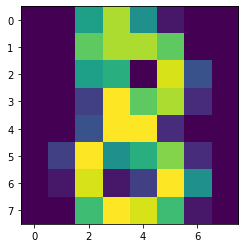

In [9]:
plt.imshow(digits.images[8])

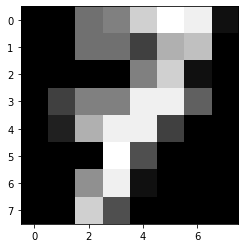

In [10]:
plt.imshow(digits.images[7],cmap=plt.cm.gray)

In [11]:
digits.data.shape

(1797, 64)

In [12]:
digits.images.shape

(1797, 8, 8)

In [13]:
digits.images[7]

array([[ 0.,  0.,  7.,  8., 13., 16., 15.,  1.],
       [ 0.,  0.,  7.,  7.,  4., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  8., 13.,  1.,  0.],
       [ 0.,  4.,  8.,  8., 15., 15.,  6.,  0.],
       [ 0.,  2., 11., 15., 15.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 15.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  5.,  0.,  0.,  0.,  0.]])

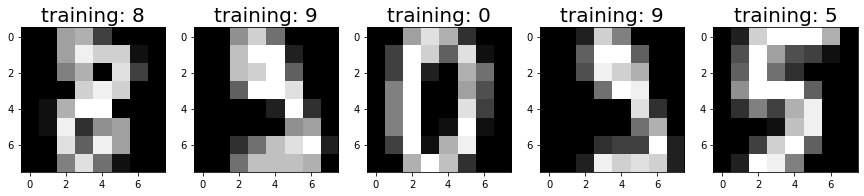

In [14]:
plt.figure(figsize=(15,4))
#width,height
# index--> where i will place my image
# image--> what image i need to print
# label--> what you need to label your image

# enumerate--> iterating function
# zip--------> helps me execute multiple conditions at the same time
for index,(image,label)  in enumerate(zip(digits.data[28:33],digits.target[28:33])):
  plt.subplot(1,5,index+1)
  #index+1--> in python indexing will start with 0
  plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
  plt.title(f"training: {label}",fontsize=20)


In [15]:
digits.data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [16]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [17]:
x=digits.data

In [18]:
y=digits.target

In [19]:
# standard scaler---> scaling data in order to perform pca

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
x_std=StandardScaler().fit_transform(x)

In [22]:
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [23]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
# scaled data
# cov matrix
# EV,EV
# explained variance
# CEV
# PCA

In [25]:
# x_std.T

In [26]:
cov_mat=np.cov(x_std.T)

In [27]:
cov_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

In [28]:
# cov_mat---> ev,ev---> ev--> cev
# in order to get cev we need to do all the other previous steps cov_mat---> ev,ev---> ev


In [29]:
# from my cov_mat--> ev,ev
import numpy as np

In [30]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)

In [31]:
# ev,ev----> explained varience

In [32]:
tot=sum(eig_vals)

In [33]:
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]

In [34]:
var_exp

[12.033916097734892,
 9.561054403097872,
 8.44441489262455,
 6.498407907524166,
 4.860154875966405,
 4.214119869271941,
 3.9420828035673914,
 3.389380924638329,
 2.9982210116252284,
 2.932002551252217,
 2.781805463550336,
 2.5770550925819915,
 2.2753033157642415,
 2.227179739514352,
 2.165229431849246,
 1.9141666064421354,
 1.7755470851681932,
 1.638069274284425,
 1.5964601688623532,
 1.4891911870878218,
 1.3479695658179345,
 1.2719313702347557,
 1.1658373505919533,
 1.0576465985363201,
 0.9753159471981104,
 0.9445589897319973,
 0.8630138269707223,
 0.8366428536685113,
 0.7976932484112407,
 0.7464713709260609,
 0.7255821513702755,
 0.6919112454811812,
 0.6539085355726171,
 0.6407925738459863,
 0.5913841117223418,
 0.5711624052235242,
 0.5236368034166353,
 0.48180758644514354,
 0.4537192598584495,
 0.42316275323277974,
 0.4060530699790385,
 0.3970848082758281,
 0.3564933031426166,
 0.34078718147029996,
 0.3278353352879543,
 0.3110320073453573,
 0.28857529410893396,
 0.2764892635235467,


In [35]:
# e v ---> cumulative explained variance

In [36]:
cum_var_exp=np.cumsum(var_exp)

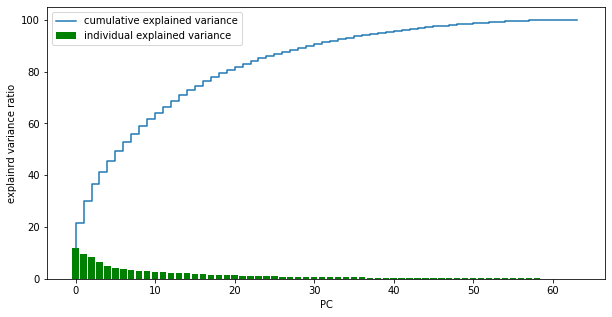

In [37]:
plt.figure(figsize=(10,5))
plt.bar(range(len(var_exp)),var_exp,label='individual explained variance',color='g')
plt.step(range(len(cum_var_exp)),cum_var_exp,label='cumulative explained variance')
plt.ylabel('explainrd variance ratio')
plt.xlabel('PC')
plt.legend()
plt.show()

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.8)

In [47]:
x_test.shape

(360, 64)

In [48]:
pca=PCA(n_components=20)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [49]:
pca_x_train.shape

(1437, 20)

In [50]:
#pca(n_components=0.97)

In [51]:
clf=DecisionTreeClassifier().fit(pca_x_train,y_train)

In [52]:
pred=clf.predict(pca_x_test)

In [53]:
accuracy_score(pred,y_test)

0.825

In [54]:
def get_misclassified_index(y_pred,y_test):
  misclassification=[]
  for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
    if predicted!=actual:
      misclassification.append(index)
  return misclassification

In [56]:
misclassification=get_misclassified_index(pred,y_test)

In [57]:
misclassification

[0,
 1,
 3,
 22,
 45,
 47,
 48,
 50,
 60,
 61,
 68,
 77,
 81,
 86,
 90,
 96,
 97,
 115,
 118,
 119,
 132,
 133,
 138,
 148,
 149,
 158,
 162,
 164,
 169,
 172,
 176,
 177,
 189,
 194,
 195,
 196,
 197,
 200,
 207,
 226,
 228,
 235,
 239,
 248,
 255,
 270,
 278,
 283,
 287,
 291,
 296,
 298,
 310,
 312,
 314,
 323,
 324,
 325,
 336,
 338,
 348,
 353,
 358]

In [58]:
misclassification[:5]

[0, 1, 3, 22, 45]

In [61]:
def plot_misclassification(misclassification):
  plt.figure(figsize=(20,4))
  for index,wrong in enumerate(misclassification[0:5]):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(pca_x_test[wrong],(5,4)),cmap=plt.cm.gray)
    plt.title('predicted :{} actual:{}'.format(pred[wrong],y_test[wrong]))


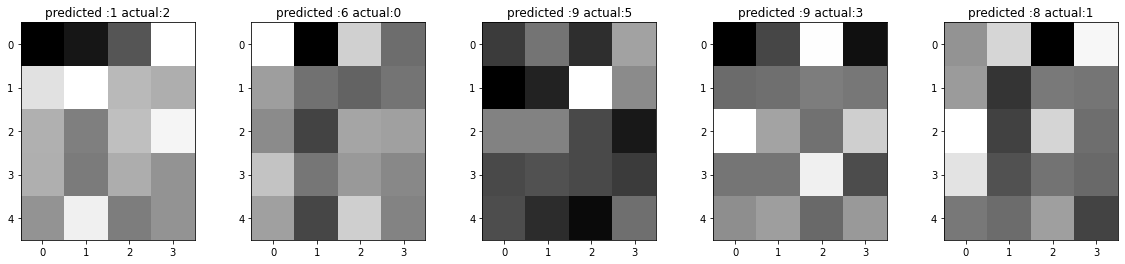

In [62]:
plot_misclassification(misclassification)